In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df1 = pd.read_csv('data/data2D.csv', header=None)
df2 = pd.read_csv('data/data1000D.csv', header=None)
arr1 = df1.to_numpy()
arr2 = df2.to_numpy()

In [78]:
class PCA:
    def __init__(self, n_components, mode = 'buggy') -> None:
        # buggy, demeaned, normalized
        # self.PC #each row is a PC
        self.mode = mode
        self.n_components = n_components

    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        if self.mode == 'normalized':
            X  = (X - self.mean) / self.std
        elif self.mode == 'demeaned':
            X = X - self.mean
        #SVD
        U, S, Vh = np.linalg.svd(X, full_matrices=True)
        self.PC = Vh[0:self.n_components]
    
    def transform(self, X):
        if self.mode == 'normalized':
            X  = (X - self.mean) / self.std
        elif self.mode == 'demeaned':
            X = X - self.mean
        return X @ self.PC.T
    
    def inverse_transform(self, X):
        re =  X @ self.PC
        if self.mode == 'normalized':
            re = np.multiply(re, self.std) + self.mean
        elif self.mode == 'demeaned':
            re = re + self.mean
        return re
    
    def set_mode(self, mode):
        self.mode = mode
        

In [184]:
class ORD:
    def __init__(self, n_components) -> None:
        # buggy, demeaned, normalized
        # self.PC #each row is a PC
        self.n_components = n_components

    def fit(self, X):
        self.b = X.mean(axis = 0)
        U, S, Vh = np.linalg.svd(X-self.b, full_matrices=True)
        self.A = Vh[0:self.n_components].T @ np.diag(S[0:self.n_components]).T
        self.S_trunc = S[0:self.n_components]
        return S
    
    def transform(self, X):
        return (X - self.b)  @ self.A @ np.diag((1/self.S_trunc)**2)
    
    def inverse_transform(self, X):
        return X @ self.A.T + self.b

In [152]:
np.diag(np.array([1,2,3]))[0:1] **2

array([[1, 0, 0]])

In [208]:
pca = PCA(n_components=1, mode='buggy')


recs_error:  0.5003042814256453


d:\ProgramData\Anaconda3\envs\ECE204\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


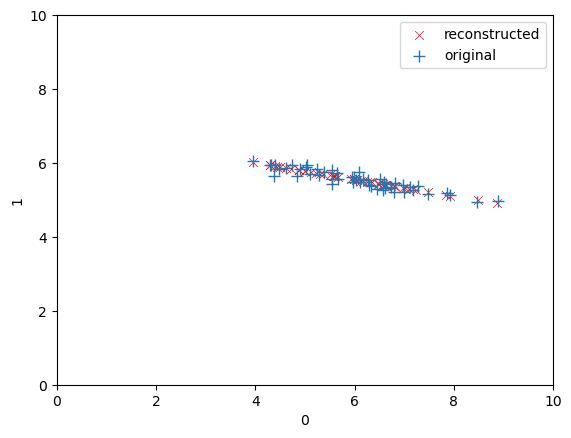

In [203]:
ord = ORD(n_components=1)
ord.fit(arr1)
trans = ord.transform(arr1)
recons = ord.inverse_transform(trans)
dfre = pd.DataFrame(recons)
ax1 = dfre.plot.scatter(x = 0, y =1, c='red',s = 40, marker = 'x', linewidths=0.5)
df1.plot.scatter(x = 0, y = 1,facecolors='none', s = 80,edgecolors='b', ax = ax1, marker ='+', linewidths=1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.legend(['reconstructed', 'original'])
plt.savefig("ord_2d.pdf")
print()
print('recs_error: ', np.sum((arr1 - recons)**2))


recs_error:  44.34515418673971


d:\ProgramData\Anaconda3\envs\ECE204\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


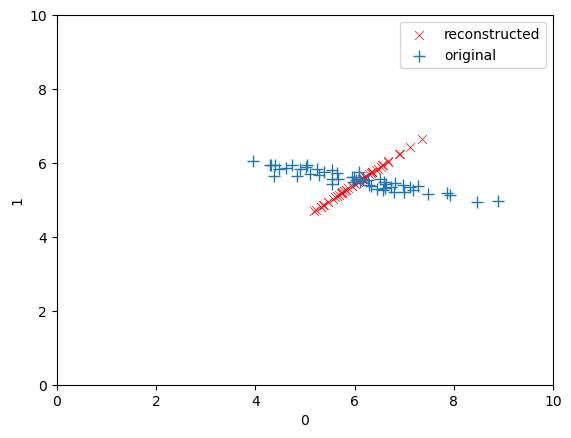

In [211]:
pca.set_mode('buggy')
pca.fit(arr1)
trans = pca.transform(arr1)
recons = pca.inverse_transform(trans)
dfre = pd.DataFrame(recons)
ax1 = dfre.plot.scatter(x = 0, y =1, c='red',s = 40, marker = 'x', linewidths=0.5)
df1.plot.scatter(x = 0, y = 1,facecolors='none', s = 80,edgecolors='b', ax = ax1, marker ='+', linewidths=1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.legend(['reconstructed', 'original'])
plt.savefig("buggy_2d.pdf")
print()
print('recs_error: ', np.sum((arr1 - recons)**2))


recs_error:  2.4736041727385336


d:\ProgramData\Anaconda3\envs\ECE204\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


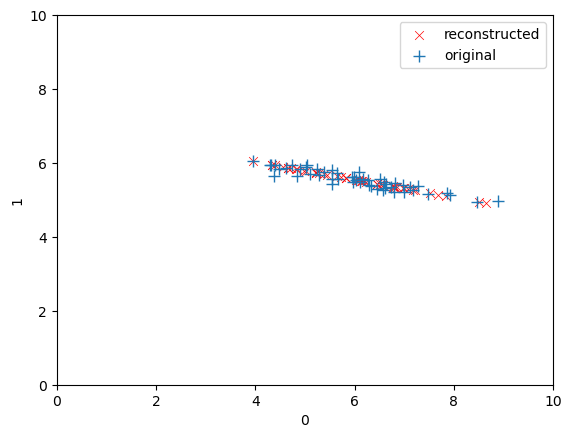

In [210]:
pca.set_mode('normalized')
pca.fit(arr1)
trans = pca.transform(arr1)
recons = pca.inverse_transform(trans)
dfre = pd.DataFrame(recons)
ax1 = dfre.plot.scatter(x = 0, y =1, c='red',s = 40, marker = 'x', linewidths=0.5)
df1.plot.scatter(x = 0, y = 1,facecolors='none', s = 80,edgecolors='b', ax = ax1, marker ='+', linewidths=1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.legend(['reconstructed', 'original'])
plt.savefig("normalized_2d.pdf")
print()
print('recs_error: ', np.sum((arr1 - recons)**2))

recs_error:  0.5003042814256452


d:\ProgramData\Anaconda3\envs\ECE204\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(


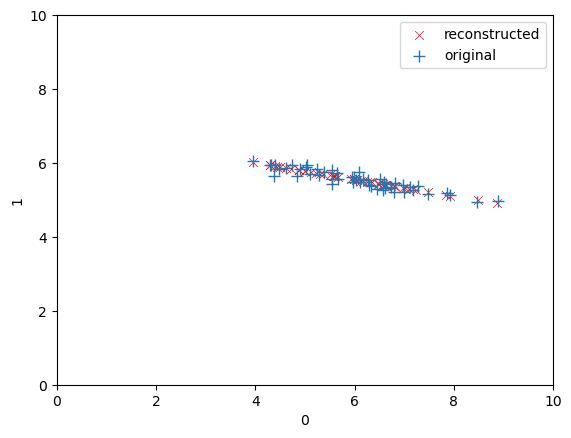

In [205]:
pca.set_mode('demeaned')
pca.fit(arr1)
trans = pca.transform(arr1)
recons = pca.inverse_transform(trans)
dfre = pd.DataFrame(recons)
ax1 = dfre.plot.scatter(x = 0, y =1, c='red',s = 40, marker = 'x', linewidths=0.5)
df1.plot.scatter(x = 0, y = 1,facecolors='none', s = 80,edgecolors='b', ax = ax1, marker ='+', linewidths=1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.legend(['reconstructed', 'original'])
plt.savefig("demeaned_2d.pdf")
print('recs_error: ', np.sum((arr1 - recons)**2))

In [212]:
pca = PCA(n_components=30)
pca.set_mode('buggy')
pca.fit(arr2)
trans = pca.transform(arr2)
recons = pca.inverse_transform(trans)
dfre = pd.DataFrame(recons)
print('recs_error: ', np.sum((arr2 - recons)**2))

recs_error:  401365.69931017933


In [198]:
pca = PCA(n_components=30)
pca.set_mode('demeaned')
pca.fit(arr2)
trans = pca.transform(arr2)
recons = pca.inverse_transform(trans)
dfre = pd.DataFrame(recons)
print('recs_error: ', np.sum((arr2 - recons)**2))

recs_error:  136522.9794893014


In [199]:
pca = PCA(n_components=30)
pca.set_mode('normalized')
pca.fit(arr2)
trans = pca.transform(arr2)
recons = pca.inverse_transform(trans)
dfre = pd.DataFrame(recons)
print('recs_error: ', np.sum((arr2 - recons)**2))

recs_error:  136814.29049881164


In [196]:
ord = ORD(n_components=30)
Sigma = ord.fit(arr2)
trans = ord.transform(arr2)
recons = ord.inverse_transform(trans)
dfre = pd.DataFrame(recons)
print('recs_error: ', np.sum((arr2 - recons)**2))

recs_error:  136522.9794893014


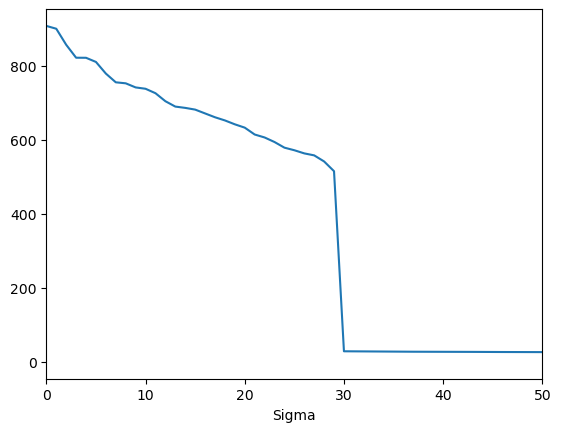

In [200]:
plt.plot(Sigma)
plt.xlim([0,50])
plt.xlabel('Sigma')
plt.savefig('sigma.pdf')

In [193]:
Sigma[0:31]

array([906.94461775, 899.34718331, 856.07628329, 821.12489866,
       820.94190853, 809.72510286, 778.2870252 , 754.74792599,
       752.02532151, 740.94514811, 737.31190921, 725.31727282,
       703.71435255, 689.22314877, 685.70740528, 681.0734858 ,
       670.6490996 , 660.40414309, 651.84280526, 641.34969726,
       632.37312193, 613.86440729, 605.86803322, 593.57132199,
       578.34722842, 571.36873052, 562.88654934, 557.5354287 ,
       541.10084128, 514.78601313,  28.72590083])

In [151]:
np.array([[1,1],[2,2]])+np.array([1.1,1.1])
pca.mean

array([6.01897974, 5.54693477])